## Calculating the Return of a Portfolio of Securities

Load the data for a portfolio composed of 5 stocks - British Petroleum, Ford, Exxon, Lincoln, and Apple *(5_stocks_2000_2017.csv)*.

In [1]:
from platform import python_version

In [2]:
python_version()

'3.6.9'

In [3]:
import numpy as np
import pandas as pd
# from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from csv_generator_notes import get_finance_data


In [124]:
start_date = int('2017' + '01' + '01')
end_date = int('2019' + '11' + '05')
# assets = ['btc.v', 'eth.v', 'dash.v', 'bch.v', 'ltc.v', 'xrp.v', 'xmr.v', 'zec.v']
assets = ['AAPL.US', 'AMZN.US', 'WMT.US', 'NVDA.US']
# assets = ['qqq.us', 'qld.us', 'tqqq.us', 'psq.us', 'sqqq.us']

portfolio_data = get_finance_data(assets=assets, start_date=start_date, end_date=end_date)
portfolio_data.set_index('Date', inplace=True)

# portfolio_data = pd.read_csv('/Users/administrador/Documents/Finance/Herramientas/csv_generator/btc.v-eth.v-dash.v-bch.v-ltc.v-xrp.v-xmr.v-zec.v.csv', index_col='Date')

http://stooq.com/q/d/l/?s=AAPL.US&d1=20170101&d2=20191105/AAPL.US.csv
http://stooq.com/q/d/l/?s=AMZN.US&d1=20170101&d2=20191105/AMZN.US.csv
http://stooq.com/q/d/l/?s=WMT.US&d1=20170101&d2=20191105/WMT.US.csv
http://stooq.com/q/d/l/?s=NVDA.US&d1=20170101&d2=20191105/NVDA.US.csv


In [125]:
portfolio_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 2017-01-03 to 2019-11-05
Data columns (total 4 columns):
AAPL.US    716 non-null float64
AMZN.US    716 non-null float64
WMT.US     716 non-null float64
NVDA.US    716 non-null float64
dtypes: float64(4)
memory usage: 28.0+ KB


In [126]:
portfolio_data.head()

,AAPL.US,AMZN.US,WMT.US,NVDA.US
Date,,,,
2017-01-03,110.96,753.67,64.366,100.94
2017-01-04,110.84,757.18,64.741,103.30
2017-01-05,111.41,780.45,64.882,100.67
2017-01-06,112.63,795.99,63.992,102.01
2017-01-09,113.67,796.92,64.414,106.14


In [127]:
portfolio_data.tail()

,AAPL.US,AMZN.US,WMT.US,NVDA.US
Date,,,,
2019-10-30,242.53,1779.99,118.10,202.85
2019-10-31,248.02,1776.66,117.26,200.87
2019-11-01,255.05,1791.44,117.62,202.44
2019-11-04,256.73,1804.66,117.57,210.34
2019-11-05,256.36,1801.71,118.86,209.46


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

In [128]:
portfolio_data.iloc[0]

AAPL.US    110.960
AMZN.US    753.670
WMT.US      64.366
NVDA.US    100.940
Name: 2017-01-03, dtype: float64

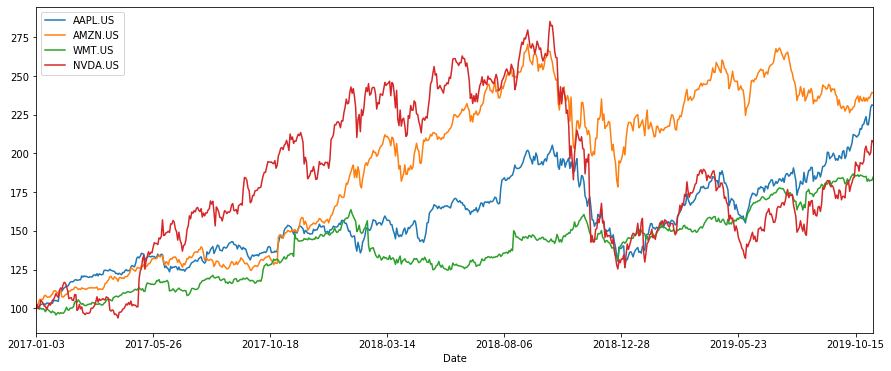

In [129]:
(portfolio_data / portfolio_data.iloc[0] * 100).plot(figsize = (15,6))

*****

### Simple returns of the securities

In [130]:
portfolio_returns = (portfolio_data / portfolio_data.shift(1)) - 1
portfolio_returns.tail()

,AAPL.US,AMZN.US,WMT.US,NVDA.US
Date,,,,
2019-10-30,-0.000124,0.009803,0.008109,0.000395
2019-10-31,0.022636,-0.001871,-0.007113,-0.009761
2019-11-01,0.028344,0.008319,0.003070,0.007816
2019-11-04,0.006587,0.007380,-0.000425,0.039024
2019-11-05,-0.001441,-0.001635,0.010972,-0.004184


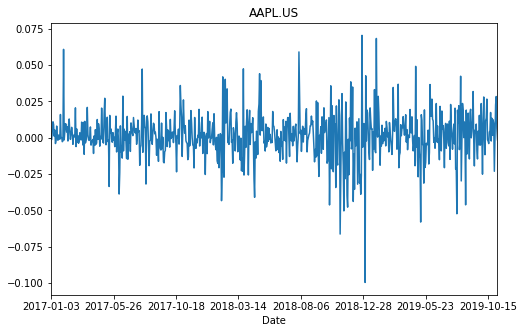

Annual Avg Returns
32.421 %


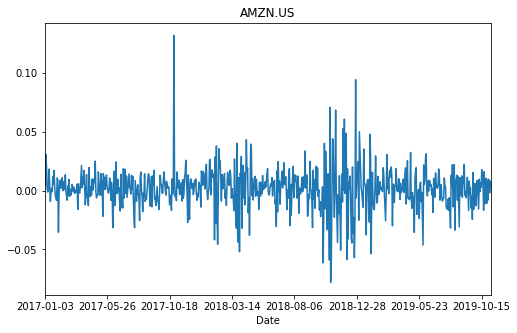

Annual Avg Returns
34.343 %


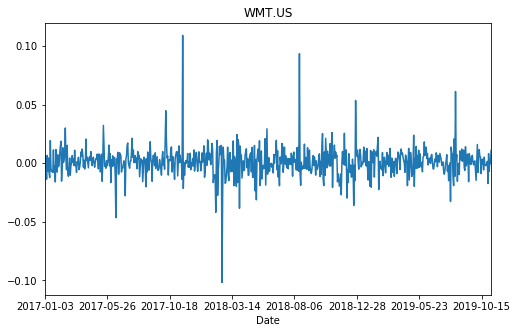

Annual Avg Returns
23.358 %


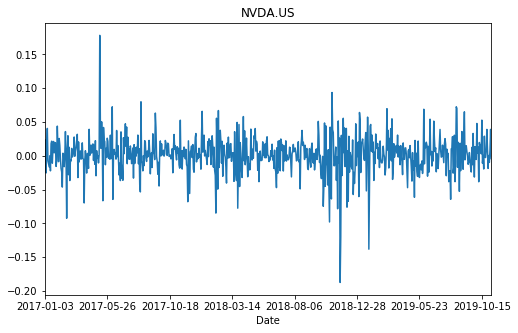

Annual Avg Returns
35.369 %

Annual Volatility (std)
AAPL.US    0.249731
AMZN.US    0.278349
WMT.US     0.195697
NVDA.US    0.441173
dtype: float64

Annual Risk
AAPL.US    3.948592
AMZN.US    4.401089
WMT.US     3.094243
NVDA.US    6.975553
dtype: float64


In [131]:
for key in portfolio_returns: 
    
    portfolio_returns[key].plot(figsize=(8, 5))
    plt.title(key)
    plt.show()
    annual_avg_return = portfolio_returns.mean() * 250
    print("Annual Avg Returns")    
    print(str(round(annual_avg_return[key], 5) * 100) + ' %')
print()
print('Annual Volatility (std)')
print(portfolio_returns.std() * 250 ** 0.5)
print()
print('Annual Risk')
print(portfolio_returns.std() * 250)
    

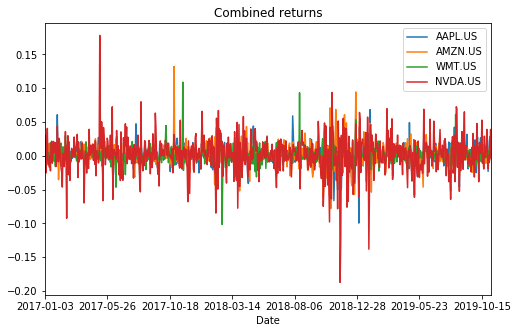

In [132]:
for key in portfolio_returns: 
    
    portfolio_returns[key].plot(figsize=(8, 5))
plt.title('Combined returns')
plt.legend(portfolio_returns.keys())
plt.show()

First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [133]:
# Covariance Matrix
portfolio_returns.cov() * 250

,AAPL.US,AMZN.US,WMT.US,NVDA.US
AAPL.US,0.062366,0.042260,0.010778,0.055607
AMZN.US,0.042260,0.077478,0.011829,0.065785
WMT.US,0.010778,0.011829,0.038297,0.017660
NVDA.US,0.055607,0.065785,0.017660,0.194633


In [134]:
# Correlation Matrix
portfolio_returns.corr()


,AAPL.US,AMZN.US,WMT.US,NVDA.US
AAPL.US,1.000000,0.607944,0.220530,0.504720
AMZN.US,0.607944,1.000000,0.217161,0.535707
WMT.US,0.220530,0.217161,1.000000,0.204552
NVDA.US,0.504720,0.535707,0.204552,1.000000


In [145]:
# Calculatinf efficient frontier
pfolio_returns = []
pfolio_risks = []
pfolio_weights = []
num_assets = len(assets)

for _ in range(2000):
    
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_weights.append(weights)
    pfolio_returns.append(np.sum(weights * portfolio_returns.mean()) * 250)
    pfolio_risks.append(np.sqrt(np.dot(weights.T, np.dot(portfolio_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_risks = np.array(pfolio_risks)
pfolio_weights = np.array(pfolio_weights)

pfolio_returns, pfolio_risks, pfolio_weights

(array([0.32126213, 0.33277593, 0.31170126, ..., 0.33590997, 0.30729908,
        0.31850743]),
 array([0.24734116, 0.27082847, 0.24017818, ..., 0.27015212, 0.19973609,
        0.22640793]),
 array([[0.04845077, 0.39649634, 0.224217  , 0.33083589],
        [0.01036946, 0.49675554, 0.12914269, 0.36373231],
        [0.05421404, 0.27217088, 0.31301735, 0.36059772],
        ...,
        [0.16797195, 0.39585786, 0.07298363, 0.36318656],
        [0.16289416, 0.43796024, 0.30884452, 0.09030109],
        [0.41337652, 0.17208176, 0.17674911, 0.2377926 ]]))

Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

In [146]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Risk': pfolio_risks})

In [147]:
portfolios.head()

,Return,Risk
0,0.321262,0.247341
1,0.332776,0.270828
2,0.311701,0.240178
3,0.311314,0.215042
4,0.326001,0.235914


In [148]:
portfolios.tail()

,Return,Risk
1995,0.316440,0.233974
1996,0.299385,0.220243
1997,0.335910,0.270152
1998,0.307299,0.199736
1999,0.318507,0.226408


Text(0, 0.5, 'Expected Return')

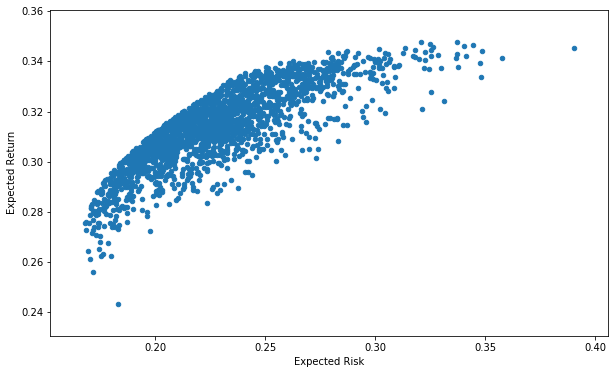

In [149]:
portfolios.plot(x='Risk', y='Return', kind='scatter', figsize=(10,6))
plt.xlabel('Expected Risk')
plt.ylabel('Expected Return')

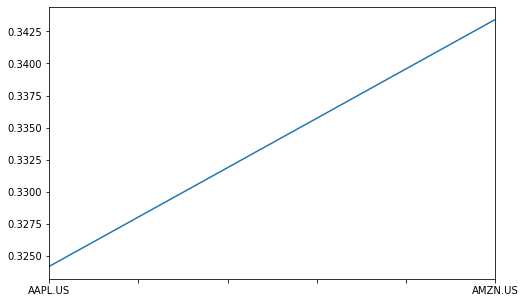

In [98]:
annual_returns = portfolio_returns.mean() * 250
annual_returns.head()
annual_returns.plot(figsize=(8, 5))

### Return of a portfolio

In [39]:
np.dot(annual_returns, weights)

0.12310033933289037

In [40]:
portfolio_return  = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
portfolio_return

'12.31 %'

In [41]:
cov_matrix_anual = portfolio_returns.cov() * 250
cov_matrix_anual

,BP,F,XOM,LNC,AAPL
BP,0.079305,0.035976,0.047954,0.057300,0.027714
F,0.035976,0.180890,0.030863,0.093179,0.046810
XOM,0.047954,0.030863,0.058614,0.050471,0.026174
LNC,0.057300,0.093179,0.050471,0.280214,0.054486
AAPL,0.027714,0.046810,0.026174,0.054486,0.171563


In [42]:
corr_matrix = portfolio_returns.corr()
corr_matrix

,BP,F,XOM,LNC,AAPL
BP,1.000000,0.300365,0.703359,0.384378,0.237598
F,0.300365,1.000000,0.299729,0.413872,0.265716
XOM,0.703359,0.299729,1.000000,0.393823,0.261010
LNC,0.384378,0.413872,0.393823,1.000000,0.248500
AAPL,0.237598,0.265716,0.261010,0.248500,1.000000


## Calculating Portfolio Risk


In [55]:
portfolio_variance = np.dot(weights.T, np.dot(portfolio_returns.cov() * 250, weights))
portfolio_variance

0.0735248377926543

In [56]:
portfolio_volatility = (np.dot(weights.T, np.dot(portfolio_returns.cov() * 250, weights))) ** 0.5
portfolio_volatility

0.27115463815441976

### Portfolio Risk

In [57]:

print(str(round(portfolio_volatility, 5) * 100) + ' %')

27.115000000000002 %


## Calculating Diversifiable and Non-Diversifiable Risk of a Portfoli

In [58]:
anual_variances_with_weights = {}
weight_counter = 0
for key in portfolio_returns:
    anual_variances_with_weights[key] = portfolio_returns[key].var() * 250, weights[weight_counter]
    weight_counter += 1

anual_variances_with_weights


{'BP': (0.07930548460970487, 0.2),
 'F': (0.18089044346045402, 0.3),
 'XOM': (0.05861365692037635, 0.2),
 'LNC': (0.28021397043530194, 0.2),
 'AAPL': (0.17156268896807073, 0.1)}

In [67]:
diversifiable_risk = portfolio_variance
for key, value in anual_variances_with_weights.items():
    
    weighted_v = (value[1] ** 2 * value[0])
    
    diversifiable_risk -= weighted_v
#     print(weighted_v)
diversifiable_risk

0.038803746512917396

### Diversified Risk

In [68]:
print (str(round(diversifiable_risk*100, 3)) + ' %')

3.88 %


## Calculating Non-diversifiable Risk 

In [70]:
non_diversifiable_risk = portfolio_variance - diversifiable_risk
non_diversifiable_risk

0.0347210912797369

In [75]:
print (str(round(non_diversifiable_risk*100, 3)) + ' %')

3.472 %


### Checking the results

In [73]:
risk_sum = 0
for key, value in anual_variances_with_weights.items():
    risk_sum += (value[1] ** 2 * value[0])
risk_sum

0.0347210912797369

In [74]:
non_diversifiable_risk == risk_sum

True